In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [46]:
#df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
df = pd.read_excel('databases_keep_out.xlsx', keep_default_na=False)
#reads projects from Excel file

len(df)
df


,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [47]:
df3 = df.copy()
df3

,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [79]:
df4 = df.copy()
df4.rename(columns={'Lines': 'Amount of Projects'}, inplace=True)
df4

,Databases,Source,Amount of Projects
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [48]:
pd.options.plotting.backend = "plotly"


In [49]:
import plotly.express as px

In [50]:
import plotly.graph_objects as px

In [127]:
import plotly.express as px

# Define custom color sequence
colors = ["black", "gray", "silver"]

fig = px.bar(df4, x="Databases", y="Amount of Projects", color="Source", text_auto=True, color_discrete_sequence=colors)
fig.update_layout(title_text='Distributions of Projects per Databases classify by Source', title_x=0.5, height = 1500, width = 1500, bargap = 0.09)
fig.show()


colors = {'Relational':'silver','NoSQL':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

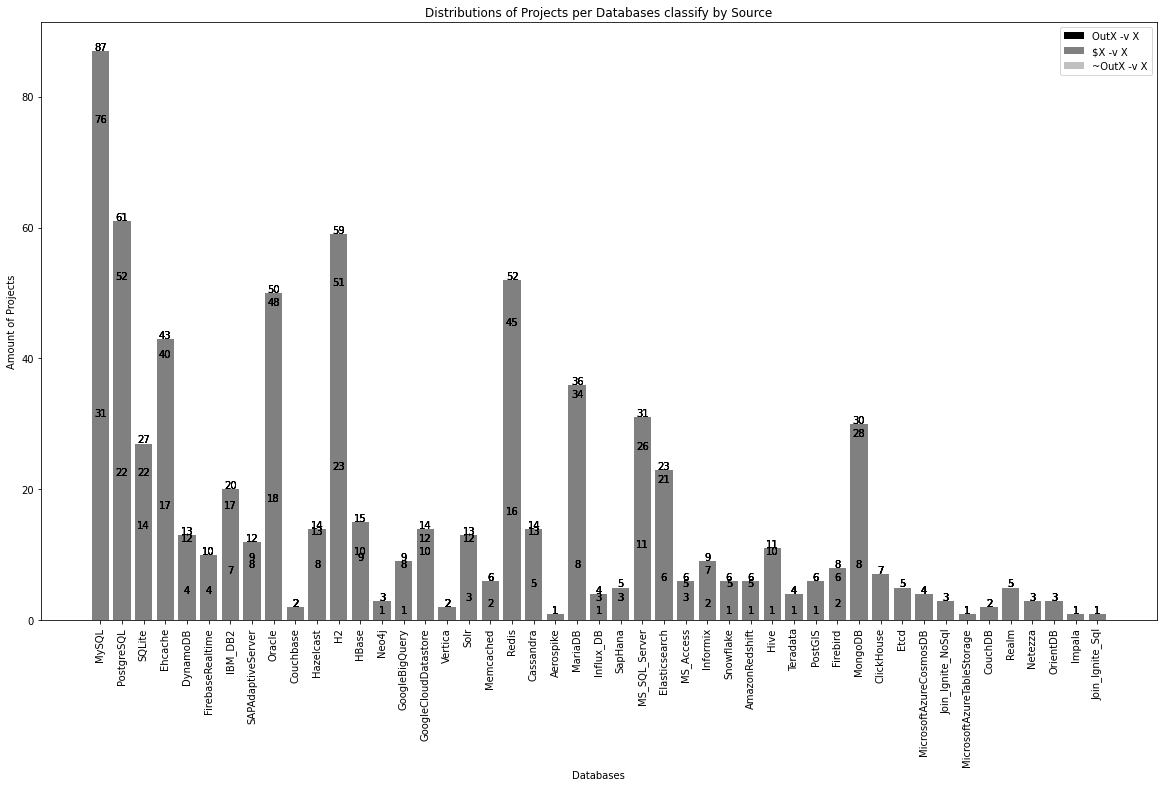

In [53]:
colors = {'OutX -v X':'black','$X -v X':'gray','~OutX -v X':'silver'}
c = df3['Source'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Lines'], color=c) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Lines'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified


plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Source')
ax.legend()
plt.xticks(rotation=90)

#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

In [54]:
#df4=pd.DataFrame(data,columns=["Name","Age","Height(cm)","Weight(kg)"])
#colors = {'OutX -v X':'red','$X -v X':'gray', '~OutX -v X':'silver'}
#c = df3['Source'].apply(lambda x: colors[x])

plot = df3.plot(x="Databases", y=['Source','Lines'], kind="bar", width=0.8, figsize=(20,11),
     title = 'Comparative distribution of database inputs and outputs', color = c)
plt.xlabel('Databases')
plt.ylabel('Amount of projects')
#plt.xticks('Databases', rotation=90)

#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

TypeError: bar() got an unexpected keyword argument 'figsize'

In [ ]:
colors = {'OutX -v X':'red','$X -v X':'gray', '~OutX -v X':'silver'}
c = df3['Source'].apply(lambda x: colors[x])

df_grouped = df3.groupby('Source').sum()[['OutX -v X','$X -v X', '~OutX -v X']]
# numerical x

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

x = np.arange(0, len(df_grouped.index))# plot bars
plt.bar(x - 0.3, df_grouped['OutX -v X'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped['$X -v X'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_grouped['~OutX -v X'], width = 0.2, color = '#6EAF46')
#plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')

bars = ax.bar(df3['Databases'], df3['Lines'], color=c) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Lines'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified


plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Source')
ax.legend()
plt.xticks(rotation=90)


plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 31)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
#plt.update_layout(barmode='stack')


KeyError: "None of [Index(['OutX -v X', '$X -v X', '~OutX -v X'], dtype='object')] are in the [columns]"

In [ ]:
import plotly.express as px
fig2 = px.bar(df3)
fig2.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [ ]:
colors = {'OutX -v X':'red','$X -v X':'gray', '~OutX -v X':'silver',}
c = df3['Source'].apply(lambda x: colors[x])

#px.figure(figsize=(20,11))
#ax = px.subplot(111) #specify a subplot

bars = px.bar(df3['Databases'], df3['Lines'], color=c, barmode= 'stack') #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Lines'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified


#px.xlabel("Databases")
#px.ylabel("Amount of Projects")
#px.title('Distributions of Projects per Databases classify by Source')
#ax.legend()
#px.xticks(rotation=90)
#plt.show()
for i in px.patches:
    px.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
#plt.update_layout(barmode='stack')

AttributeError: module 'plotly.express' has no attribute 'patches'

AttributeError: 'Figure' object has no attribute 'patches'

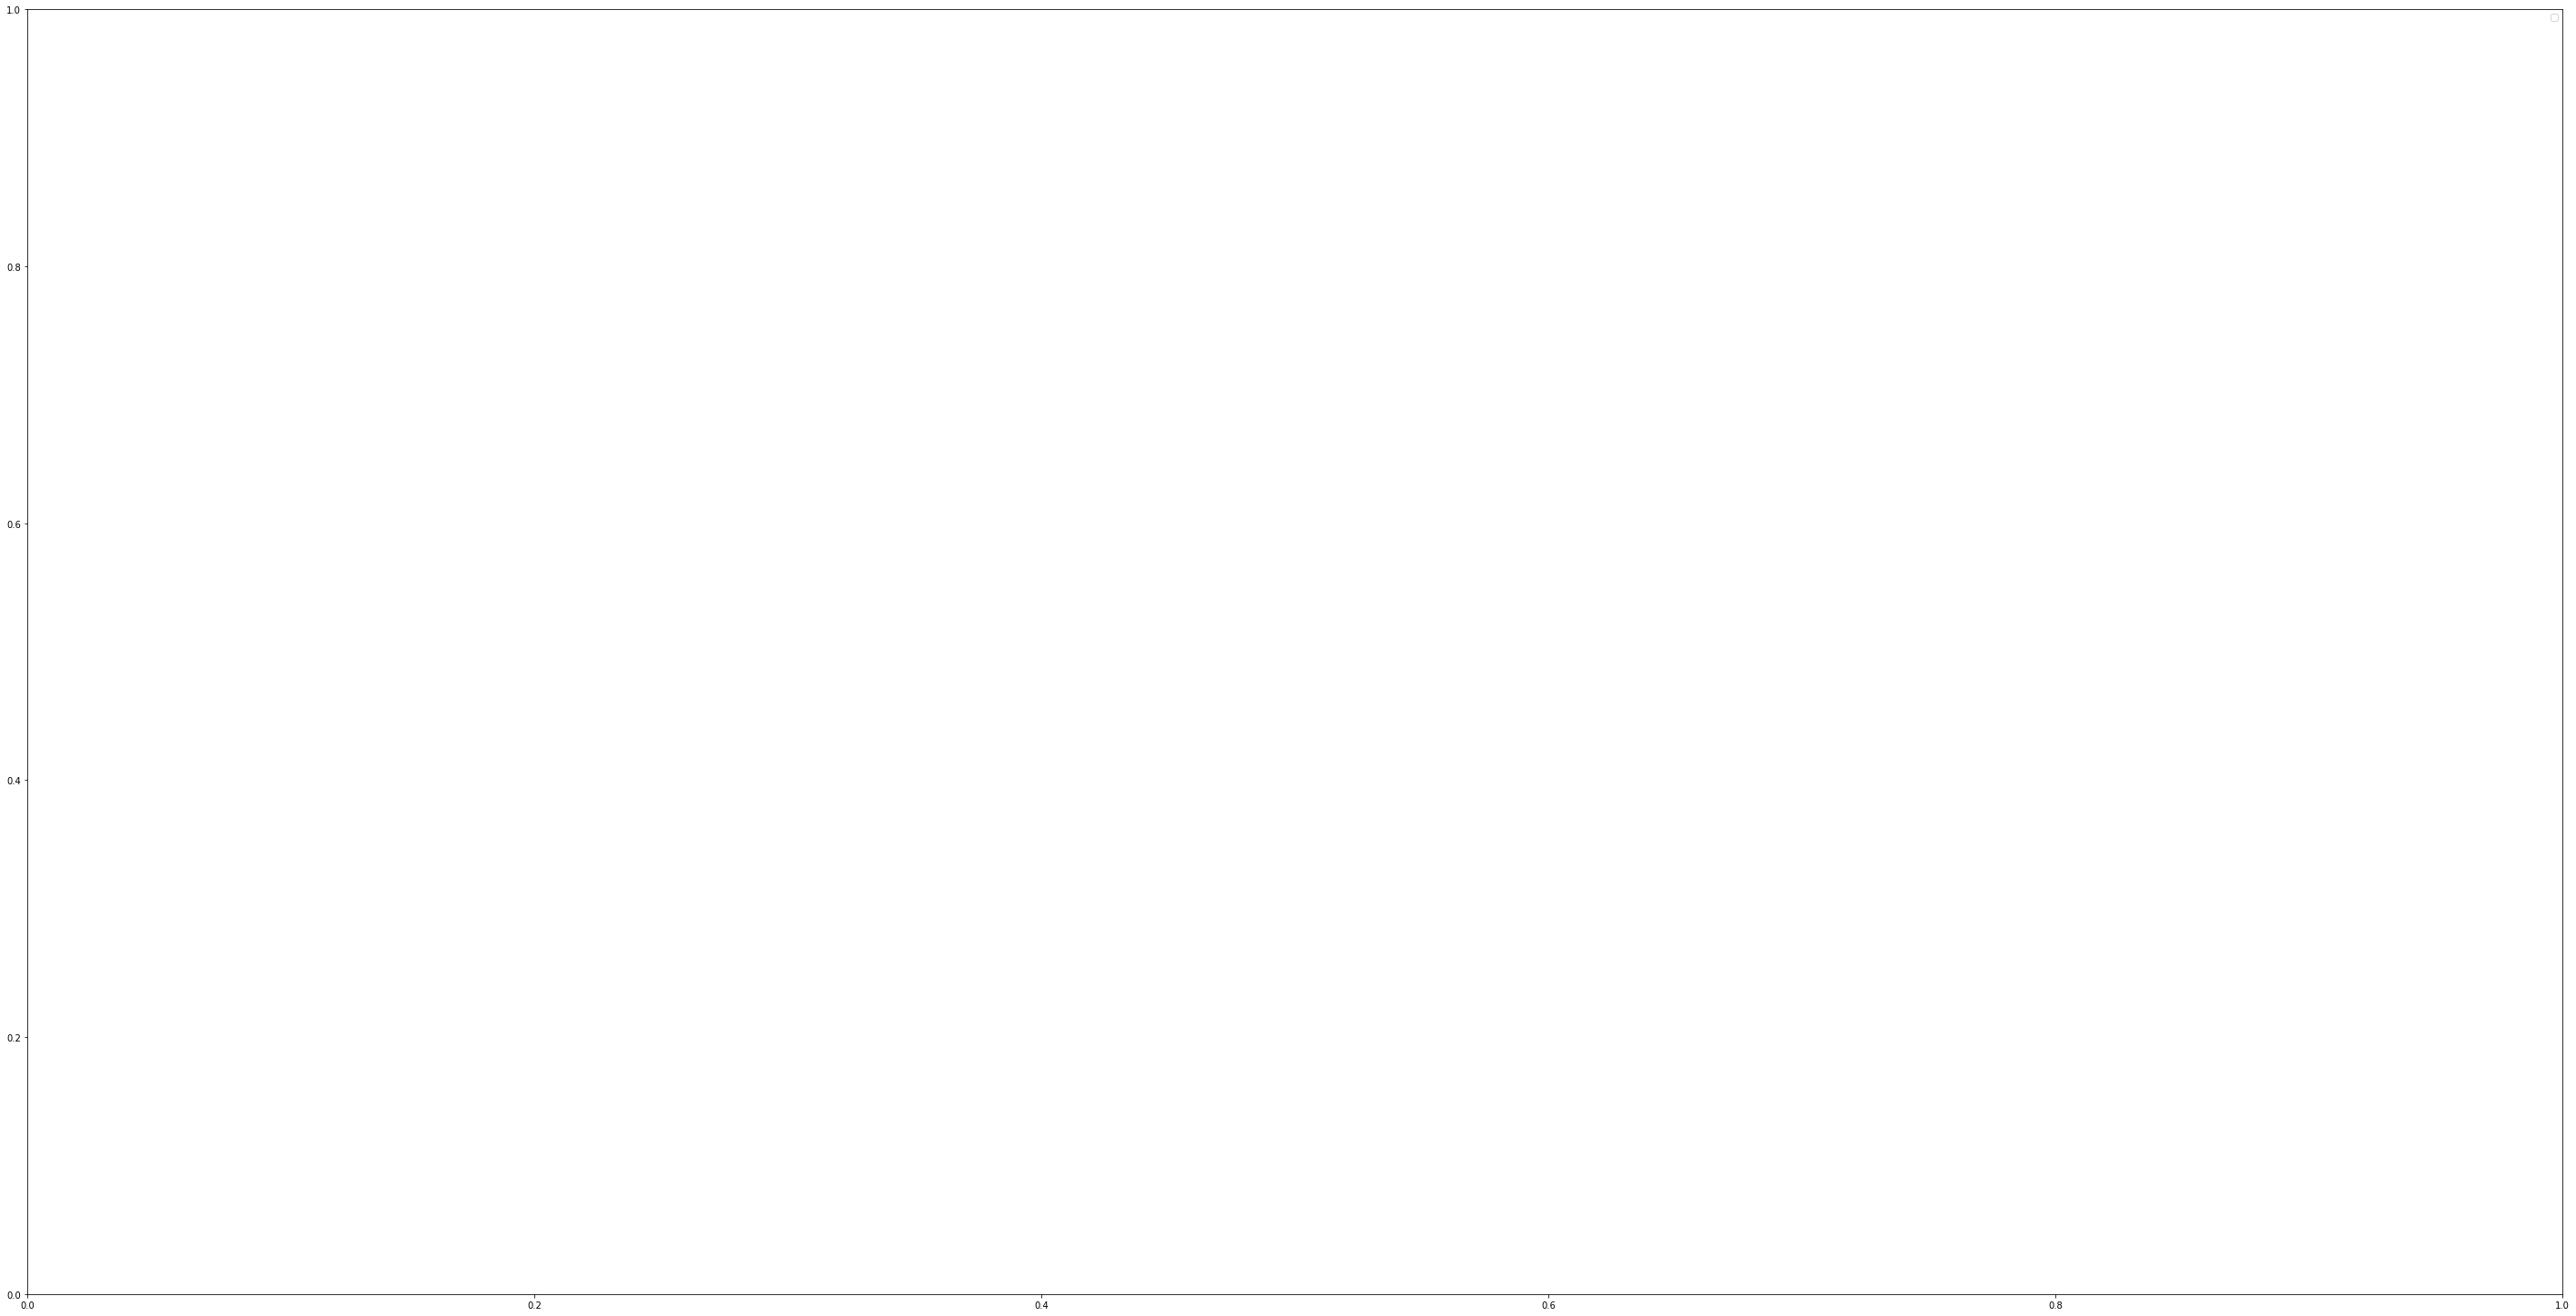

In [ ]:
#from pyexpat import model
#color = dfnames['type'].map(colors)
colors = {'OutX -v X':'DarkSGrey','$X -v X':'gray', '~OutX -v X':'silver',}
#c = df3['Source'].apply(lambda x: colors[x])
#colors = {'SQL':'blue','NoSQL':'red'}
#gender = df3['Model'].values
source = {'OutX -v X','$X -v X','~OutX -v X'}
#colors = {'apostel':'blue','lord':'green'}
#vals = ['SQL','NoSQL']
#colors = ["red" if i != 'SQL' else "NoSQL" for i in vals]
plt.figure(figsize=(50,26))
#plot = df3.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='Model')
plot = df3.plot(kind='bar', x ='Databases', y ='Lines', title = 'Distributions of Projects per Databases', color=df3['Source'].map(colors))
#df3.sort_values('Databases', ascending=False)[['Model']].plot.bar();
#plt.xlabel("Databases")
#plt.ylabel("Projects")
plt.legend(source)
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')